<img align="center" src="https://quantumspain-project.es/wp-content/uploads/2022/11/Logo_QS_EspanaDigital.png" width="800px"/>
<figure>
<a id='fig_ref'></a>
<img src="./Images/Logo_TalentQ_Azul.png" align=center width='200px'/>
</figure>
<br>
<br>



<table width="100%"><td style=" font_style:italic; font-size:50px;text-align:center;background-color:rgba(0, 220, 170,0.7)">
<div>
Superposición, Paralelismo, Interferencia
</div>
</td></table>

<figure>
<img src="./Images/vectors.png" align=center width='40%' style='margin:automatic'/>
</figure>



Abril 2025

Autores:

* Juan Santos (IGFAE-USC)
* Irais Bautista (CESGA)
* Javier Mas (IGFAE-USC)

Traducción a Qibo
* Carlos Luque (IAC)


<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img aling="left" alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />Licencia: <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Licencia Creative Commons Atribución-CompartirIgual 4.0 Internacional</a>.

$ \renewcommand{\bra}[1]{\langle #1|} $
$ \renewcommand{\ket}[1]{|#1\rangle} $
$ \renewcommand{\braket}[2]{\langle #1|#2\rangle} $


In [1]:
# Librerías generales
import matplotlib.pyplot as plt
import numpy as np

import qibo
from qibo import gates
from qibo.models import Circuit

#Uso de backend de numpy en Qibo\n",
qibo.set_backend("numpy")

# Función de dibujado de circuito con matplotlib 
from qibo.ui import plot_circuit
%matplotlib inline

[Qibo 0.2.16|INFO|2025-03-26 15:02:34]: Using numpy backend on /CPU:0


In [2]:
# definición de funciones de ayuda 

# función para mostrar circuit de un qubit 
miplot_circuit = lambda circuit: plot_circuit(circuit, cluster_gates=False, style="quantumspain")
qsplot_circuit = lambda circuit: plot_circuit(circuit, style="quantumspain")

# función para mostrar el histrograma de un dictionario

def plot_histogram (data_dict):
    # Extract keys and values
    x_values = list(data_dict.keys())   # estados cuanticos
    y_values = list(data_dict.values()) # las cuentas

    
    plt.bar(x_values, y_values, edgecolor='black', alpha=0.7)

    # Customize x-axis
    plt.xticks(x_values)  # Solo mostrar los estados cuanticos

    # Labels and title
    plt.xlabel('Estados cuánticos')
    plt.ylabel('Cuentas')
    plt.title('Frecuencias')

    # mostrar la gráfica
    plt.show()

En este cuaderno vamos a experimentar con dos recursos que ofrece la mecánica cuántica y que se utilizan para obtener ventaja computacional. 

- El **paralelismo**. Se deduce del *principio de superposición*. Éste afirma que un estado general de un sistema cuántico es una superposición lineal de todos los asociados a los posibles resultados que pueden aparecer  al medir. 
<br>

- La **interferencia**. Los coeficientes de la superposición pueden anularse (interferencia destructiva)  en una secuencia de procesos sucesivos. 

#  Superposición

<div class="alert alert-block alert-info">

- El estado de un **bit** sólo puede ser 0 ó 1. 
<br>
    
- El estado de un **cúbit** puede ser una <i>superposición</i> lineal $a \ket{0} + b \ket{1}$ con $|a|^2 + |b|^2 = 1$
<br>
    
    - Los estados $\ket{0}$ y $\ket{1}$ forman una *base*
    
    - Los coficientes  $a$ y $b$ son  *amplitudes* de probabilidad. En general son números complejos.

    - Los números reales y positivos $|a|^2$ y $|b|^2$ son las *probabilidades* de que, al medir, obtengamos 0 ó 1 y (el estado colapse a $\ket{0}$ ó $\ket{1}$).

</div>


## Circuito cuántico


El estado <b>inicial</b> en un circuito cuántico es siempre $\ket{\psi} = \ket{0}$, cuya medida dará siempre el valor cierto 0 
    
- A partir de él, podemos <b>preparar</b> un estado arbitrario aplicando puertas cuánticas
    
$$
\ket{0} ~~~\stackrel{\hbox{puertas}}{\longrightarrow}~~~ \ket{\psi} = a \ket{0} + b \ket{1} ~~~~~\hbox{con}~~ |a|^2 + |b|^2 = 1
$$
<br>

- Cada vez que <b>medimos</b>, el estado colapsa a $\ket{0}$ ó a $\ket{1}$
$$
\ket{\psi} = a \ket{0} + b \ket{1} ~~~\stackrel{\hbox{medidas}}{\longrightarrow}~~~
\left\{ \begin{array}{cc}\hbox{mide} & \hbox{sale} \\  0 & \ket{0} \\   1 &   \ket{1} \end{array} \right.
$$
<br>


- Podemos tener acceso a $|a|$ y $|b|$ midiendo $N$ veces y hallando las <b>frecuencias relativas</b> con las que aparecen 0 y 1


$$
|a|^2 = \frac{n(0)}{N} ~~~~~~,~~~~~~~ |b|^2 = \frac{n(1)}{N}
$$
    
    


## Circuitos de 1 cúbit

- La puerta $X$ es el análogo cuántico de la puerta clásica NOT

$$
X \ket{0} = \ket{1} ~~~~~~~~~~X \ket{1} = \ket{0}
$$

- La puerta $Z$ cambia el signo a $\ket{1}$
$$
Z \ket{0} = \ket{0}~~~~~~~~~~Z\ket{1} = -\ket{1}~~~
$$
<br>
No tiene análogo clásico, ya que no existe un bit que  tome el valor  -1
<br>
<br>

- La puerta $H$ (o de *Hadamard*) crea un estado superposición
<br>
$$
H \ket{0} =\frac{1}{\sqrt{2}} \big( \ket{0} + \ket{1}\big) ~~~~~~~H\ket{1} =\frac{1}{\sqrt{2}} \big( \ket{0} - \ket{1}\big)
$$
<br>
que tampoco tiene análogo clásico


(<Axes: >, <Figure size 60x60 with 1 Axes>)

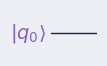

In [3]:
qbits = 1
qc = Circuit(qbits)

# desconectar para añadir puertas al circuito
#qc.add(gates.X(0))
#qc.add(gates.H(0))
#qc..add(gates.Y(0))

miplot_circuit(qc)

Podemos analizar el resultado de **dos manera distintas**: 

- escribiendo el vector resultante en la base $\ket{0}, \ket{1}$

In [4]:
Nejecucion = 1000
result = qc.execute(nshots=Nejecucion)

print(qc.final_state)

(1+0j)|0>


- Efectuando medidas para visualizar las amplitudes

In [5]:

# Se crea un nuevo circuit para añadir las mediciones

qbits = 1
qc = Circuit(qbits) 

# desconectar para añadir puertas al circuito
#qc.add(gates.X(0))
#qc.add(gates.H(0))
#qc.add(gates.Y(0))


# se añade medicciones 
qc.add(gates.M(*range(qbits)))

Nejecucion = 1000
result = qc.execute(nshots=Nejecucion)

medidas = result.frequencies()
print("Medidas: ", medidas)

Medidas:  Counter({'0': 1000})


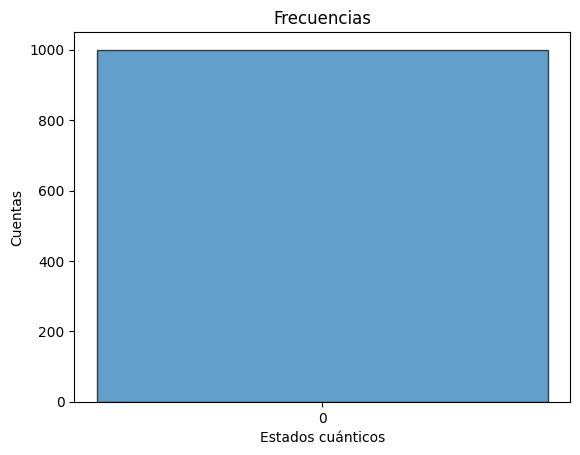

In [6]:
plot_histogram(result.frequencies())

vamos a recuperar los valores de las probabilidades

$$p(0) = |a|^2 = \frac{n(0)}{N} ~~~~~~~\hbox{y} ~~~~~~~~~ p(1) = |b|^2 = \frac{n(1)}{N}$$

In [7]:
# esta función nos devuelve las probabilidades de cada estado

probabilidades = result.probabilities()
print("probabilidades: ", probabilidades)

probabilidades:  [1. 0.]


<div class="alert alert-block alert-success">
<b>¡A jugar!</b>:   
Modifica el circuito y observa los estados que se obtienen. Observa las frecuencias relativa y recupera los valores de $|a|^2$ y $|b|^2$    
</div>


## Circuitos de varios cúbits 

- Pensemos en 2 cúbits, cada uno de los cuales está en un estado arbitrario. El estado **conjunto** se escribe así *(producto tensorial)*
<br>
$$
\big(a_1 \ket{0} + b_1\ket{1}\big)\otimes \big( a_2\ket{0} + b_2\ket{1}\big) = 
a_1a_2 \ket{00} + a_1 b_2 \ket{01} + a_2 b_1 \ket{10} + a_2 b_2 \ket{11}
$$
<br>

Decimos que los estados $\{ \ket{00},\ket{01},\ket{10},\ket{11} \}$ forman una base del espacio de dos cúbits.
<br>
<br>

- Al medir ambos cúbits,   
$$
\begin{array}{ccc}
\hbox{obtendremos resultados} & \hbox{con probabilidad} & \hbox{y el estado colapsa a} \\
00 & |a_1a_2|^2 & \ket{00} \\
01 & |a_1b_2|^2 & \ket{01}\\
10 & |b_2a_1|^2 & \ket{10}\\
11 & |b_2b_2|^2 & \ket{11}\\
\end{array}
$$
<br>


<div class="alert alert-block alert-warning">
<i>Puedes probar fácilmente que la suma de todos estos números es igual a 1. Es decir, son probabilidades.</i>
</div>

Vamos a generar estados posibles mediante puertas de 1 cúbit insertadas en cada registro del circuito

(<Axes: >, <Figure size 180x120 with 1 Axes>)

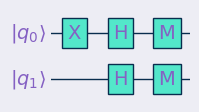

In [8]:
qbits = 2
qc2 = Circuit(qbits)#
qc2.add(gates.X(0))
qc2.add(gates.H(0))
qc2.add(gates.H(1))

qc2.add(gates.M(*range(qbits)))

Nejecucion = 1000
result2 = qc2.execute(nshots=Nejecucion)

qsplot_circuit(qc2)

Escribimos el estado resultante en la *base de estados*

In [9]:
print(qc2.final_state)

(0.5+0j)|00> + (0.5+0j)|01> + (-0.5+0j)|10> + (-0.5+0j)|11>


Finalmente, obtenemos acceso a las probabilidades de cada suceso haciendo medidas

De aquí deducimos la *estadística de las medidas*


Medidas=  Counter({'10': 276, '01': 253, '11': 245, '00': 226})


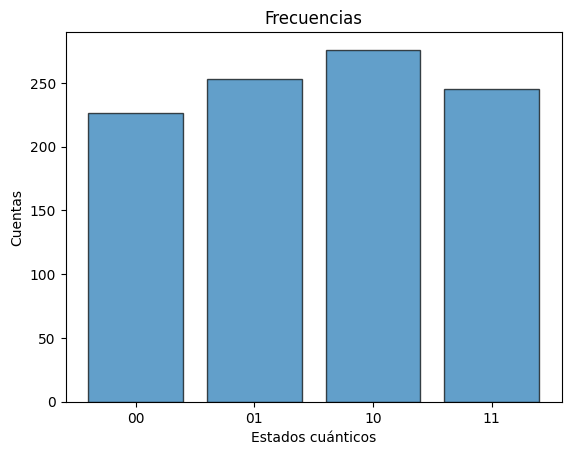

In [10]:
medidas = result2.frequencies()
print("Medidas= ", medidas)

# graficamos en un histograma
plot_histogram(medidas)

Escribimos las probabilidades

In [11]:
probabilidades = result2.probabilities()
print("probabilidades: ", probabilidades)

probabilidades:  [0.25 0.25 0.25 0.25]


<div class="alert alert-block alert-success">
<b>Juega:</b> modifica el circuito cambiando las puertas y obtén las probabilidades de medidas 
</div>

# Paralelismo

En la sección anterior hemos puesto $n=2$. Ahora podemos volver y aumentar este valor a voluntad. 

A continuación nos vamos a fijar en un circuito concreto, en el que aplicamos la puerta $H$ a cada uno de los cúbits en el estado $\ket{0}$

(<Axes: >, <Figure size 60x180 with 1 Axes>)

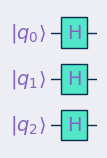

In [12]:
qbits = 3
qc3 = Circuit(qbits)

for i in range(qbits):
    qc3.add(gates.H(i))


qsplot_circuit(qc3)

<div class="alert alert-block alert-success">
<b>Ejercicio:</b> Obten el vector de estado que sale tanto en su representación algebráica
</div>

In [13]:
# Aquí tu solución como representación en la base 
#
qc3.add(gates.M(*range(qbits)))

Nejecucion = 1000 
result3 = qc3.execute(nshots=Nejecucion)
#######

<div class="alert alert-block alert-success">
<b>Ejercicio:</b> añade medidores y obtén la estadística asociada a este estado
</div>

Números de estados cuánticos = 8
Medidas =  Counter({'001': 139, '100': 136, '101': 131, '011': 129, '010': 126, '110': 115, '111': 114, '000': 110})


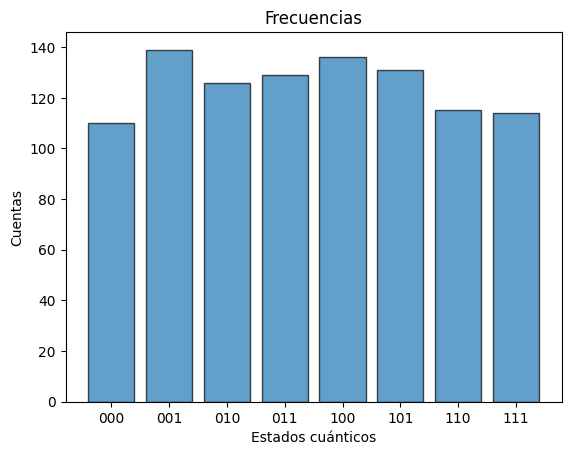

probabilidades:  [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]


In [14]:
# Aquí tu solución como representación sobre las esferas de Bloch
#
medidas = result3.frequencies()
print("Números de estados cuánticos =", len(medidas))
print("Medidas = ", medidas)

# graficamos en un histograma
plot_histogram(medidas)

probabilidades = result3.probabilities()
print("probabilidades: ", probabilidades)
#

<div class="alert alert-block alert-success">

<b>Ejercicio:</b> repite las celdas anteriores, subiendo el valor de $n$.
</div>

En un **computador clásico**, la operación anterior requeriría 

-   disponer de $2^n$ registros de memoria vacíos. Uno de ellos, el $00...0$ en valor 1 y los demás todos en 0.

-  modificar *uno* a *uno* todos estos registros hasta poner todos ellos a valer 1 .

En un **computador cuántico** los dos requisitos son soslayados 

- el estado de $n$ cúbits *alberga* automáticamente $2^n$ amplitudes no nulas  

- el proceso de cambiar todas las $2^n$ amplitudes se realiza simultáneamente (paralelismo cuántico).

<div class="alert alert-block alert-warning">
<b> Notación </b>  
<br>

Un número entero $x$ lo expresaremos de forma indistinta como un número decimal $x \in \mathbb{N}$, o como una n-tupla $ x \in \{ 0,1\}^n$ que se obtiene completando con 0's el número $x$ escrito en base 2

*Ejemplo*: con $n=4$, podemos escribir de forma indistinta $x = 7$ ó $x = 0111$. De este modo el vector $\ket{0111} $   de la base de $n=4$ cúbits puede respresentarse como $\ket{7}$.  
</div>

In [15]:
n=4
x=7
xn = format(x, '0' + str(n) + 'b')

print(' |' + xn + ' > = |' + str(x) + ' >')

 |0111 > = |7 >


<div class="alert alert-block alert-success">
<b>Ejercicio:</b> Escribe el resultado que hallaste antes en notación decimal

$$
H^n \ket{0}_n \to H\ket{0} ..... H\ket{0} =~ ?
$$

hazlo con $n=3$
</div>

# Interferencia

<div class="alert alert-block alert-info">

Las <b>probabilidades</b> $|a|^2$ y $|b|^2$ son siempre números positivos. Por tanto, es **imposible** que una suma de probabilidades se anule.

Las **amplitudes de probabilidad**, $a$ y $b$ son números reales, o incluso complejos. Por tanto, es **posible** conseguir que un resultado tenga  tenga una probabilidad nula, $a + b = 0$, a pesar de que todas las amplitudes que contribuyen no sean nulas. Este es el fenómeno de la interferencia. 
</div>






## La moneda cuántica

Un cúbit es un análogo cuántico de una moneda. Cuando lo medimos, el resultado es siempre $\ket{0} \sim \hbox{Cara}$, ó bien $\ket{1} \sim \hbox{Cruz}$. 

Vamos a comprobar, experimentalmente, que <b>actuar con la puerta $H$</b>  es el <i>análogo cuántico</i> de  <b>tirar la moneda al aire</b>




Basta con comproba que, **al medir**, la probabilidad de cada resultado 0 ó 1, es igual a $1/2$ al igual que en el caso de una moneda. 

El siguiente circuito efectúa $N$ tiradas y  medidas de una moneda cuántica incialmente en el estado $\ket{0}$

Medidas=  Counter({'0': 505, '1': 495})


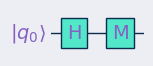

In [16]:
qbits = 1
qc4 = Circuit(qbits)#

# descomenta esta línea si quieres tirar una moneda cuántica desde el estado |1>
# qc4.add(gates.X(0))

qc4.add(gates.H(0))
qc4.add(gates.M(*range(qbits)))

qsplot_circuit(qc4)


Nejecucion = 1000
result4 = qc4.execute(nshots=Nejecucion)

medidas4 = result4.frequencies()
print("Medidas= ", medidas4)


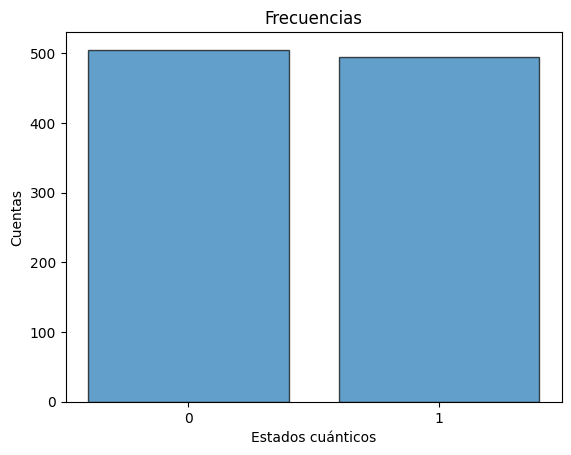

In [17]:
# graficamos en un histograma
plot_histogram(medidas4)

Vamos a estudiar el análogo cuántico de tirar <u>dos veces seguidas</u> **observando el resultado después de cada tirada** 

Medidas=  Counter({'0': 55, '1': 45})


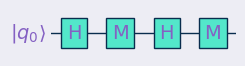

In [18]:
# Programa un circuito que efectúe dos tiradas y medidas sucesivas. 

qbits = 1
qc5 = Circuit(qbits)


#------
# aquí tu solución




#-------
# Solución
qc5.add(gates.H(0))
qc5.add(gates.M(*range(qbits)))
qc5.add(gates.H(0))
qc5.add(gates.M(*range(qbits)))

miplot_circuit(qc5) 

Nejecucion = 100
result5 = qc5.execute(nshots=Nejecucion)

medidas5 = result5.frequencies()
print("Medidas= ", medidas5)


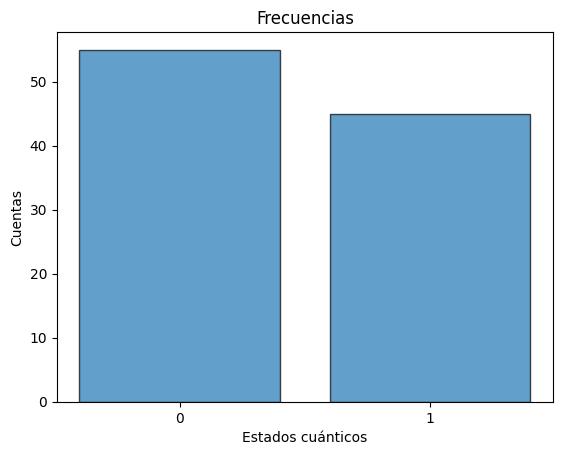

In [19]:
# graficamos en un histograma
plot_histogram(medidas5)

Es un resultado esperable porque cualquier estado inicial $\ket{0}$ ó $\ket{1}$ conducen a la misma probabilidad final $1/2$  de encontrar 0 y 1.

¿Qué esperamos que pase con una moneda, si efectuamos <u>dos tiradas sucesivas</u>, pero **no miramos entre cada tirada**?

Medidas=  Counter({'0': 100})


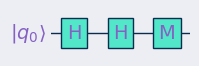

In [354]:
# Programa un circuito que efectúe dos tiradas sucesivas y una sola medida después

qbits = 1
qc6 = Circuit(qbits)
#------
# aquí tu solución


#-------
# Solución

qc6.add(gates.H(0))
qc6.add(gates.H(0))
qc6.add(gates.M(*range(qbits)))

miplot_circuit(qc6) 

Nejecucion = 100
result6 = qc6.execute(nshots=Nejecucion)

medidas6 = result6.frequencies()
print("Medidas= ", medidas6)


<div class="alert alert-block alert-danger">
    <b>¡ ha desaparecido la posibilidad de hallar un resultado distinto al inicial ! </b>
<br>    
    
- Si empezamos en $\ket{0}$ (cara)  **siempre** obtendremos $0$  (cara) y **nunca** obtendremos $1$ (cruz)
    
- Si empezamos en $\ket{1}$ (cruz) **siempre** obtendremos $1$ (cruz) y **nunca** obtendremos $0$ (cara)
    
Es decir, hay un resultado que tiene **probabilidad nula** de aparecer en la segunda tirada, a pesar de que *no tiene probabilidad nula* en la primera tirada.     
    
</div>

<div class="alert alert-block alert-success">
<b>Sugerencias para jugar:</b> analiza qué pasa cuando tiras más veces antes de medir. ¿Ves algún patrón?
</div>

## Explicación teórica de la moneda cuántica


- Si inicialmente la moneda se encuentra en $\ket{0}$ (cara), *tirarla al aire* significa aplicar $H$ para ponerla en superposición equilibrada

\begin{align}
H : \ket{0}  &\to    \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle   
\end{align}

En este estado, las probabilidades de colapsar a  $\ket{0}$ (cara) ó a $\ket{1}$ (cruz) al medir vienen dadas por 


$$
p(0) = \left\vert  +\frac{1}{\sqrt{2}}\right\vert^2 = 0.5~~~~,~~~~ p(1) = \left\vert  +\frac{1}{\sqrt{2}}\right\vert^2 = 0.5
$$

- Idénticamente, si tiramos una moneda cuántica que se encuentra inicialmente en $\ket{1}$ (cruz)

\begin{align}
H : \ket{1}  &\to    \frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle   
\end{align}

las probabilidades de obtener 0 ó 1   son las mismas

$$
p(0) = \left\vert  +\frac{1}{\sqrt{2}}\right\vert^2 = 0.5~~~~,~~~~ p(1) = \left\vert  -\frac{1}{\sqrt{2}}\right\vert^2 = 0.5
$$


Hasta aquí, igual que con una moneda clásica, ambas condiciones iniciales conducen a idénticas estadísticas. 


- Ahora bien, si realizamos **dos tiradas seguidas sin medir** entre ambas, obtendremos lo siguiente

\begin{align}
\ket{0}~~\stackrel{\hbox{dos tiradas}}{\longrightarrow}~~ H^2\ket{0}  ~~ = ~~ H\frac{1}{\sqrt{2}}\Big(|0\rangle + |1\rangle \Big)  =  \frac{1}{\sqrt{2}}\Big(H|0\rangle + H|1\rangle \Big) ~~ = & ~~~
 \frac{1}{\sqrt{2}}
\left( \frac{1}{\sqrt{2}}\big(|0\rangle + |1\rangle \big) + \frac{1}{\sqrt{2}}\big(|0\rangle - |1\rangle \big) \right) \\
& =\left( \frac{1}{2}+\frac{1}{2}\right) \ket{0} + \left( \frac{1}{2}-\frac{1}{2}\right) \ket{1} \rule{0mm}{8mm}\\
& = \ket{0}  \rule{0mm}{8mm}
\end{align} 

Observamos nítidamente que ahora, al sumarse amplitudes en lugar de probabilidades, podemos tener una **interferencia**

- **constructiva**   para obtener el resultado $\ket{0}$ con *probabilidad máxima*
<br>

- **destructiva** para obtener el resultado $\ket{1}$ con *probabilidad nula*

Idénticamente, si comenzamos con el estado $\ket{1}$ (cruz) en la moneda cuántica, a la segunda tirada obtendremos el mismo estado con certeza

\begin{align}
\ket{1} ~~\stackrel{\hbox{dos tiradas}}{\longrightarrow} ~~H^2\ket{1}  ~~ =  ~~ H\frac{1}{\sqrt{2}}\Big(|0\rangle - |1\rangle \Big)  =  \frac{1}{\sqrt{2}}\Big(H|0\rangle - H|1\rangle \Big) ~~ = & ~~~
 \frac{1}{\sqrt{2}}
\left( \frac{1}{\sqrt{2}}\big(|0\rangle + |1\rangle \big) - \frac{1}{\sqrt{2}}\big(|0\rangle - |1\rangle \big) \right) \\
& =\left( \frac{1}{2}-\frac{1}{2}\right) \ket{0} + \left( \frac{1}{2}+\frac{1}{2}\right) \ket{1} \rule{0mm}{8mm}\\
& = \ket{1}  \rule{0mm}{8mm}
\end{align} 




## El algoritmo de Bernstein-Vazirani

La computación cuántica trata de sacar ventaja de propiedades como la superposición, el paralelismo y la interferencia. Vamos a ilustrarlo con un ejemplo. 

Sea $n\in {\mathbb N}$ un entero natural, y  $a,x$ números enteros positivos $\in (0, 2^n-1)$.


Imaginemos una *colección de $2^n$ funciones* 

$$\fbox{$f_a: x \to \{0,1\}$}$$ 

etiquetadas, cada una, por un número entero $a$. La función $f_a(x)$ actúa de la siguiente manera 

$$
\fbox{$f_a(x) = a\cdot x ~\equiv~ (a_{n-1} x_{n-1}    ... + a_{0} x_{0})\, \hbox{mod}(2) $}
$$


donde $a = a_{n-1}...a_1a_0$ es la representación binaria de $a$, e igualmente para $x = x_{n-1}...x_1x_0$.

<div class="alert alert-block alert-warning">

<b>Ejemplo</b>:  supongamos que $n=4$. Entonces, por ejemplo
    
\begin{align}
f_3(4) &= 3\cdot 4 =  0011 \cdot 0100 \equiv (0*0 + 0*1 + 1*0 + 1* 0)\,\hbox{mod}(2) =  0 \,\hbox{mod}(2) = 0 \\
f_7(7) &= 7\cdot 7 = 0111 \cdot 0111 \equiv(0*0 + 1*1 + 1*1 + 1* 1)\,\hbox{mod}(2) =  3 \,\hbox{mod}(2) = 1 \\
\end{align}
    
</div>

Vamos a definir $n$ y un valor de $a$ y dar su representación binaria con $n$ dígitos. Estos valores se pueden cambiar

In [355]:
import random 
n=4

#a = random.randint(0, 2**n - 1)
a=7
a_bin = format(a, '0' + str(n) + 'b')

print('a =', a)
print('a_bin =', a_bin)

a = 7
a_bin = 0111


Ahora definimos la función $f_a(x)$ que podemos evaluar sobre cualquier argumento $x$. El valor de $a$ está oculto 

In [356]:
# Oráculo lineal clásico
def f_a(x):
    x_bin = format(x, '0' + str(n) + 'b')
    print(x_bin)
    return sum([(int(a_bin[i])*int(x_bin[i])) for i in range(n)])%2 

In [357]:
x = 7
print('f_a(x) =', f_a(x))

0111
f_a(x) = 1


<div class="alert alert-block alert-info">

<u>Problema de Bernstein-Vazirani</u> *(versión  cuántica)*
<br>       
- <u>Promesa:</u> <b>disponemos</b> de una función $f_a$,  para un $a$ 
particular **desconocido**
<br>
<br>
    
    
- <u>Problema:</u> queremos <b>adivinar</b> $a$ con el único recurso de evaluar $f_a(x)$ tantas veces como queramos sobre distintos valores de $x$. 
    
    
<br>
    
*Nota: $f_a$ es un *oráculo* al que siempre puedes preguntar todo menos cuál es su identidad*

</div>

<div class="alert alert-block alert-success">

<b>¡A jugar!</b>:  evalua la función "f_a(x)" sobre tantos $x\in (0,2^n-1)$ como necesites para averiguar el valor oculto de $a$.
</div>

In [358]:
x = random.randint(0, 2**n - 1)
# x = 7
print( 'f_a(' + str(x) +  ')=',f_a(x))

1001
f_a(9)= 1


Cuando termines, compara tu resultado con el valor correcto de $a$

In [359]:
print('a =',a)

a = 7


<div class="alert alert-block alert-warning">
 El número mínimo de veces que necesitamos consultar $g(x)$ para adivinar $a$ se denomina <em>complejidad de oráculo</em>  ${\cal C}$. En este problema, deberías haber llegado a las conclusión de que ${\cal C} = n$, crece linealmente con el número de cúbits.
</div>

<div class="alert alert-block alert-info">

<u>Problema de Bernstein-Vazirani</u> *(versión  cuántica)*
<br>
<br>    

Sea $\ket{x}$ un estado de $n$ cúbits, y $\ket{0}$ un cúbit adicional. 
<br> 
<br>    
    
- <i>Promesa:</i> disponemos de un **circuito** que implementa la acción de $f_a$ sobre cualquier estado $\ket{x}\ket{0}$ en la forma siguiente
<br>
<br>
    
$$
U_a : \ket{x} \ket{0}  \to \ket{x} \ket{f_a(x)}
$$
<br>
    
- <i>Problema:</i> queremos **adivinar** $a$ con el único recurso de ejecutar  el circuito $U_a$ y medir el estado resultante *tantas veces como queramos*. 
    
    

</div>

Dado un $a$, la siguiente función genera un circuito que implementa $U_a$ 

In [360]:
def U_a(n, a): 
    qubits = n+1
    circuit = Circuit(qubits)
    a_bin = format(a, '0' + str(n) + 'b')
    for qubit in range(n):
        if a_bin[qubit] == '1':
            circuit.add(gates.CNOT(qubits-qubit,0))
    
    return circuit

Vamos a ver que funciona. Para ello tenemos que inicializar el vector $\ket{x}$ y aplicarle $U_a: \ket{x}\ket{0} \to \ket{x}\ket{f_a(x)}$

In [361]:
# fijamos un valor de x, a, n
a = 7
x = 7
n = 4


# generamos el circuito 
circuit_oracle = U_a(n, a)
circuit_codificacion = Circuit(n+1)

# inicializamos |x>|0> 
x_bin = format(x, '0' + str(n) + 'b')
print('x_bin = ',x_bin)
for i in range(n):
    if x_bin[i] == '1':
        circuit_codificacion.add(gates.X(i+1))

# creacion del circuit BV.
circuit_unido = circuit_codificacion + circuit_oracle

# Medidas
circuit_unido.add(gates.M(0, register_name="Fa"))
circuit_unido.add(gates.M(*[ i+1 for i in range(n) ], register_name="x"))

# Corremos el circuito 1 vez para ver que efectivamente U_a implementa la función f_a
result_ejecucion = circuit_unido.execute(nshots=1)
medidas_unido = result_ejecucion.frequencies(registers=True)

key_fa = list(medidas_unido["Fa"].keys())[0]
key_x = list(medidas_unido["x"].keys())[0]
print('|x>|f_a(x)> = |'+ key_x + '>|'+ key_fa + '>')

#qsplot_circuit(circuit_unido)




x_bin =  0111
|x>|f_a(x)> = |0111>|1>


### Cómo adivinar $a$ con <u>una sola consulta</u> al oráculo cuántico

El circuito de Bernstein-Vazirani tiene las siguientes partes

1. <b>Despliegue</b> de la base computacional, aplicando $H^n\ket{0}_n = \ket{0} + \ket{1} + \ket{2} ... +   \ket{2^n-1}$
<br>

2. Evaluación <b>simultánea</b> del oráculo $U_a$ sobre <b> todos los elementos</b> de la base computacional sobre el estado $\ket{-} = Z H \ket{0}$
<br>

3. <b>Interferencia</b> destructiva de las amplitudes, que se consigue aplicando otra vez $H^n$. Este es el mismo efecto que el de la moneda cuántica, en el que todos los caminos interfieren destructivamente excepto el que conduce al vector $\ket{a}$. 
<br>

4. <b>Medida</b> del resultado. $\ket{a} \to a$. 

In [362]:
# fijamos un valor de a, n
a = 7
n = 4


# generamos el circuito 
circuit_oracle = U_a(n, a)
circuit_codificacion = Circuit(n+1)

#inicializamos la ancilla a |-> = ZH|0>
circuit_codificacion.add(gates.H(0))
circuit_codificacion.add(gates.Z(0))

#inicializamos el registro de cálculo a la superposición uniforme |0...0> + |0....1> + ....|1...1>
for i in range(n):
    if x_bin[i] == '1':
        circuit_codificacion.add(gates.H(i+1))


# creacion del circuit BV.
circuit_BV  = circuit_codificacion + circuit_oracle


#producimos la interferencia de todas las posibles historias
for i in range(n):
    if x_bin[i] == '1':
        circuit_BV.add(gates.H(i+1))

# Medidas
circuit_BV.add(gates.M(*[ i+1 for i in range(n) ], register_name="a"))

#qsplot_circuit(circuit_BV)

MeasurementResult(qubits=(1, 2, 3, 4), nshots=None)

Counter({'0111': 1})


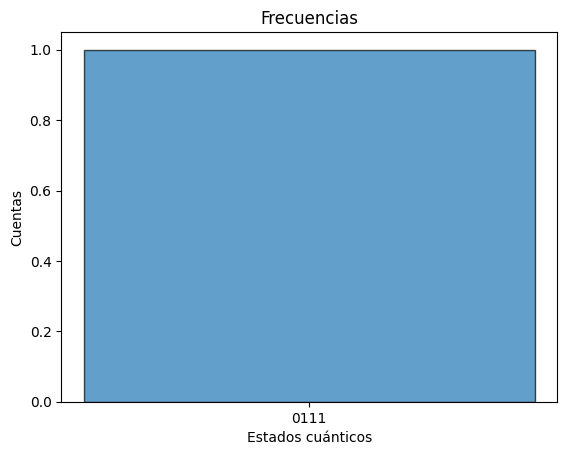

In [363]:
# Corremos el circuito 1 vez 
result_ejecucion = circuit_BV.execute(nshots=1)
medidas_a = result_ejecucion.frequencies(registers=True)["a"]
print(medidas_a)

plot_histogram(medidas_a)

In [364]:
print('el valor de a buscado es, a = ', int(list(medidas_a.keys())[0],2))

el valor de a buscado es, a =  7
